## **PROBLEM STATEMENT**
### **STEP #1:** PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

### **STEP #2:** IMPORTING DATA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv(r"data\fashion-mnist_train.csv")
test = pd.read_csv(r"data\fashion-mnist_test.csv")

### **STEP #3:** VISUALIZATION

In [8]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.shape

(60000, 785)

In [11]:
test.shape

(10000, 785)

In [ ]:
# converting the df to array
training = np.array(train, dtype='float32')
testing = np.array(test, dtype='float32')

np.int64(5)

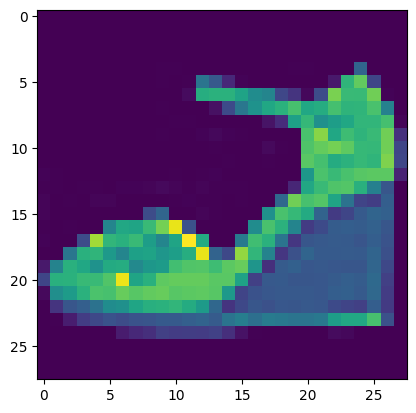

In [ ]:
# visualizing one random image from our data set
import random
i = random.randint(1,60000)

plt.imshow(training[i, 1:].reshape(28,28)) # the first one is label thats why we use 1:

label = train["label"][i] # we are also showing label of the image (like its output value )
label

In [ ]:
# The 10 classes are as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

### **STEP #4:** MODEL TRAINING

In [26]:
# MODEL MAIN DATA AS INPUT AND OUTPUT

training_input = training[:, 1:]/255 # input for training
training_output = training[:,0] # output for tarining data

# we will further tain our model with this data(we have to do train test split )

In [27]:
# data for testing
testing_imput = testing[:, 1:]/255 # input for training
testing_output = testing[:,0] # output for tarining data

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(training_input, training_output, test_size=0.3, random_state=3) 

In [ ]:
# we will reshape the data to feed cnn deep neural network : array -> 28,28,1
#model training data and testing data internal / validation data
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))

#model testing data externaal 
testing_imput = testing_imput.reshape(testing_imput.shape[0], *(28,28,1))

In [30]:
x_train.shape

(42000, 28, 28, 1)

In [31]:
x_test.shape

(18000, 28, 28, 1)

In [32]:
testing_imput.shape

(10000, 28, 28, 1)

In [36]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [37]:


model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) #(Adds 32 filters of size 3x3, Input image shape is 28x28 with 1 channel (grayscale), ReLU adds non-linearity)

# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Downsamples the feature maps by 2x2, reducing dimensionality and computation.

# Flatten the feature map
model.add(Flatten()) #Converts 2D feature maps into a 1D feature vector for the dense layers.

# Fully Connected Dense Layer
model.add(Dense(32, activation='relu')) # Fully connected layer with 32 neurons and ReLU activation.

# Output Layer (for 10 classes)
model.add(Dense(10, activation='softmax')) # Output layer with 10 neurons (for 10 classes).


c:\Users\shubu\Desktop\ML PROJECTS cX (main)\Fashion Class Classification\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [40]:

# Train the model
model.fit(x_train, y_train, batch_size=512, epochs=50, verbose=1, validation_data=(x_test, y_test))

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.8774 - loss: 0.3456 - val_accuracy: 0.8751 - val_loss: 0.3549
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.8801 - loss: 0.3392 - val_accuracy: 0.8849 - val_loss: 0.3228
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.8863 - loss: 0.3137 - val_accuracy: 0.8881 - val_loss: 0.3144
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.8951 - loss: 0.3006 - val_accuracy: 0.8901 - val_loss: 0.3145
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.8922 - loss: 0.3054 - val_accuracy: 0.8964 - val_loss: 0.2974
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.9024 - loss: 0.2769 - val_accuracy: 0.8941 - val_loss: 0.2974
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9046 - loss: 0.2717 - val_accuracy: 0.8976 - val_loss: 0.2921
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9062 - loss: 0.2653 - val_accuracy: 0.

### **STEP #5:** EVALUATION 

In [ ]:
predictions = model.predict(x_test) #  returns the probabilities for each of the 10 classes.
predicted_classes = np.argmax(predictions, axis=1) # selects the index of the highest probability
predicted_classes

563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


array([9, 6, 8, ..., 5, 8, 6], shape=(18000,))

In [ ]:
evaluation = model.evaluate(x_test, y_test) # on testing data
print("Test Accuracy: {:.3f}".format(evaluation[1]))

563/563 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9073 - loss: 0.2699
Test Accuracy: 0.909


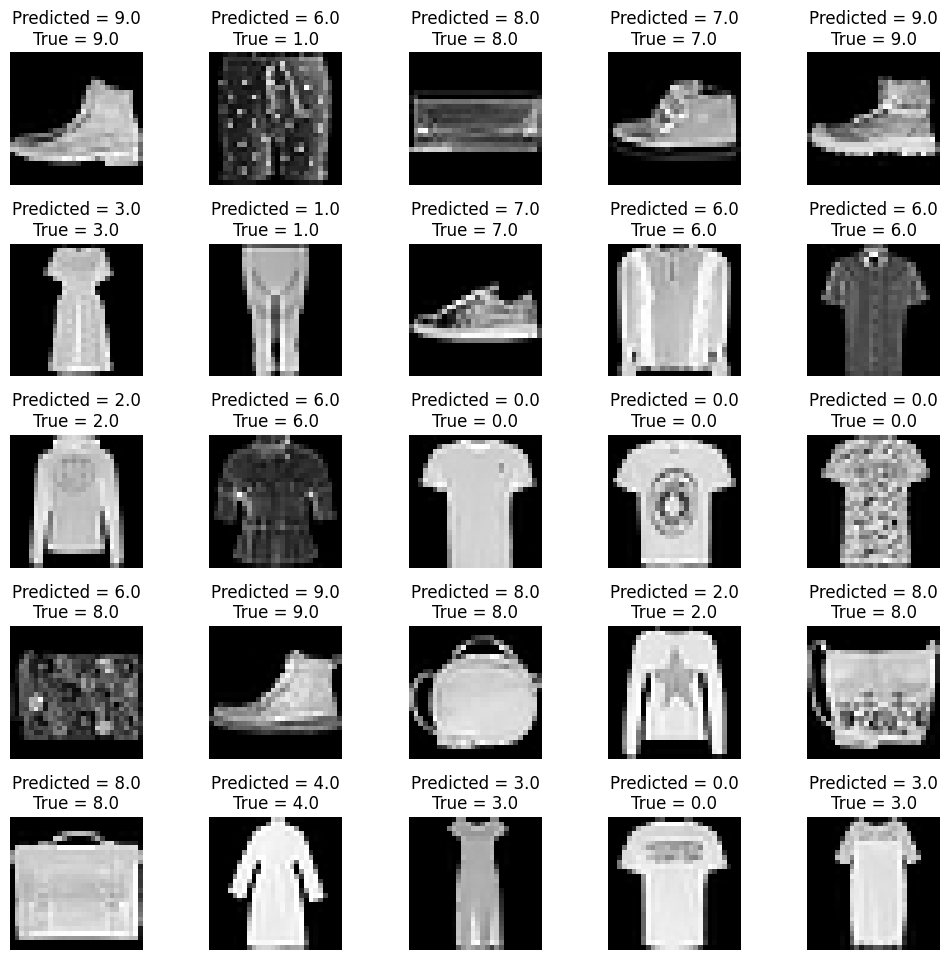

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Set the grid size: 5 rows (L) and 5 columns (W) = 25 images
L = 5
W = 5

# Create a figure and a grid of subplots (L x W) with specified size
fig, axes = plt.subplots(L, W, figsize=(12, 12))  

# Flatten the 2D array of axes to 1D so we can loop easily
axes = axes.ravel()  # Turns 2D axes[L][W] into a 1D list of axes

# Loop through the first 25 test images (0 to L*W-1)
for i in np.arange(0, L * W):
    # Show the image reshaped to 28x28 grayscale
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')

    # Set the title of the subplot to show predicted and actual class
    axes[i].set_title(
        "Predicted = {:0.1f}\nTrue = {:0.1f}".format(predicted_classes[i], y_test[i])
    )

    # Turn off the axis ticks for clarity
    axes[i].axis('off')

# Adjust spacing between subplots to prevent overlap
plt.subplots_adjust(wspace=0.5)


<Axes: >

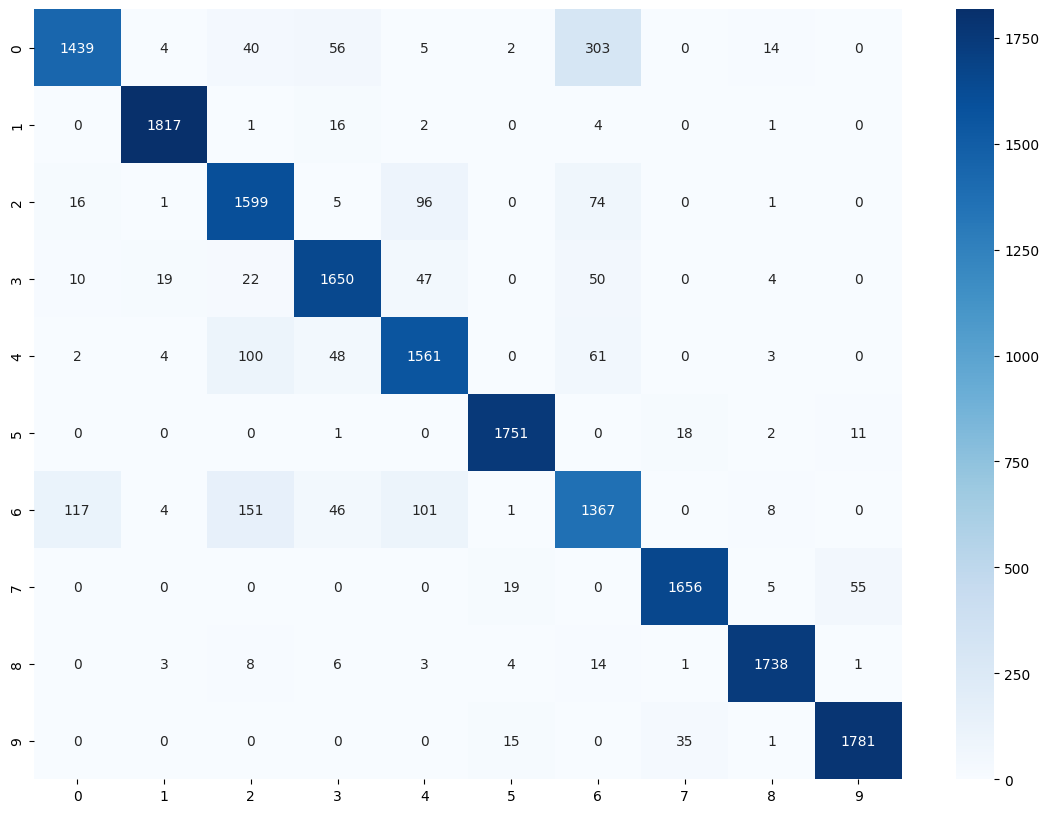

In [46]:
from sklearn.metrics import confusion_matrix  # Import function to compute the confusion matrix

# Generate the confusion matrix by comparing true vs predicted labels
cm = confusion_matrix(y_test, predicted_classes)

# Create a new figure with specified size for the heatmap
plt.figure(figsize=(14, 10))

# Plot the confusion matrix using seaborn's heatmap
# `annot=True` shows the actual numbers in each cell
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Optional: fmt='d' ensures integers, cmap sets color


In [49]:
from sklearn.metrics import classification_report  # Import function to generate classification metrics (precision, recall, F1-score, etc.)

num_classes = 10  # Set the number of classes (e.g., for digits 0–9 in MNIST)

# Create a list of target class names: ['Class 0', 'Class 1', ..., 'Class 9']
target_classes = ["Class {}".format(i) for i in range(num_classes)]

# Print the classification report comparing true vs predicted labels
# This will show precision, recall, f1-score, and support for each class
print(classification_report(y_test, predicted_classes, target_names=target_classes))


              precision    recall  f1-score   support

     Class 0       0.91      0.77      0.83      1863
     Class 1       0.98      0.99      0.98      1841
     Class 2       0.83      0.89      0.86      1792
     Class 3       0.90      0.92      0.91      1802
     Class 4       0.86      0.88      0.87      1779
     Class 5       0.98      0.98      0.98      1783
     Class 6       0.73      0.76      0.75      1795
     Class 7       0.97      0.95      0.96      1735
     Class 8       0.98      0.98      0.98      1778
     Class 9       0.96      0.97      0.97      1832

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



In [ ]:
# The 10 classes are as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

### **STEP #6:**  IMPROVEMENTS
- Imporove accuracy by adding more filters or adding a dropout layer
